In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 6.58733772, -1.45069007],
       [ 5.73016926,  1.30404643],
       [-8.26548639,  7.01966841],
       ...,
       [ 6.48618924,  1.75837731],
       [ 4.75637933,  1.08961299],
       [ 5.22202338,  0.46872731]], shape=(1000, 2))

In [4]:
y

array([0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1,

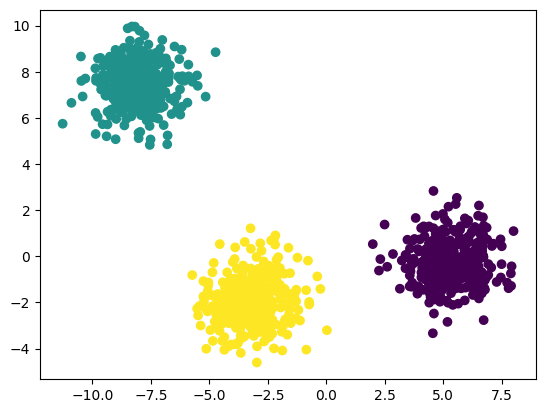

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## Standardization -- Feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
X_train_scaled

array([[ 1.1451147 , -0.31908537],
       [ 1.34741733, -0.49385517],
       [ 1.3611644 , -0.46112702],
       ...,
       [-1.13937232,  1.25387732],
       [-1.02012208,  1.04380947],
       [-1.08392678,  1.40194053]], shape=(670, 2))

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow Method to select the k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.000000000001,
 327.0363087228534,
 59.34216099940602,
 50.73228282798721,
 43.518532491826804,
 39.540554483759905,
 32.7017397691779,
 28.900287372102547,
 26.4967332093798,
 23.809685662193445]

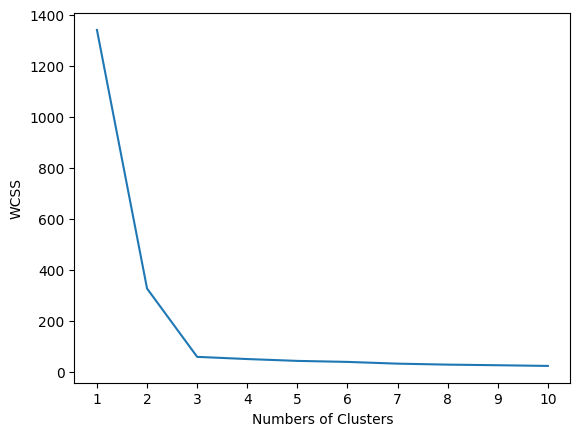

In [14]:
## Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

## Observation:
At the value of k=3 we can see that there are 3 clusters in our data.


In [15]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2,

In [17]:
y_pred = kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0,

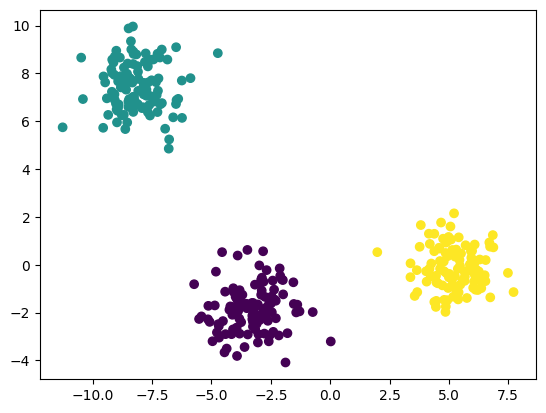

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validation of K-Means clustering algorithm ( Validating K value)
    ## KnewwLocator
    ## Silhouette Score

In [21]:
## Kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing') 

In [24]:
kl.elbow

np.int64(3)

In [25]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[0.7102153556170452,
 0.7873915933099453,
 0.6202795150358584,
 0.506303170323636,
 0.4647632203752542,
 0.34245383002751634,
 0.342240171875503,
 0.34082004761019813,
 0.34306124269694466]

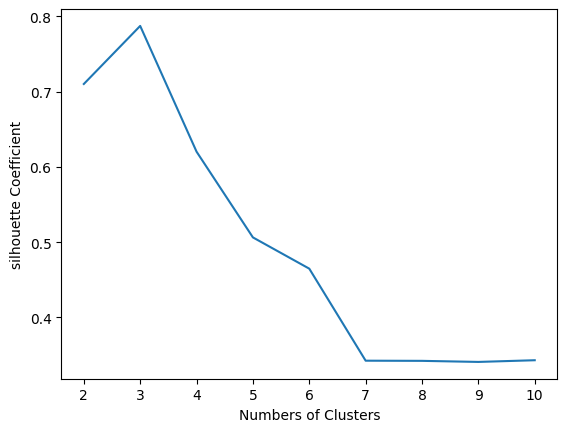

In [28]:
## Plotting Silhouette Score vs K Value
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbers of Clusters")
plt.ylabel("silhouette Coefficient")
plt.show()